In [133]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Q.1 Perform Feature Engineering
a) Perform basic exploration: Checking for top 5 records, shape, statistical info, duplicates, Null values, etc.

In [203]:
# Load Data
train_data = pd.read_excel("C:/Users/choub/Downloads/Flight_Price_Train.xlsx")
test_data = pd.read_excel("C:/Users/choub/Downloads/Flight_Price_Test.xlsx")

In [204]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [205]:
print("Shape of training data:", train_data.shape)

Shape of training data: (10683, 11)


In [206]:
# Checking stat info
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [207]:
# Checking for duplicates and Null Values
print("Number of duplicate records:", train_data.duplicated().sum())
print("Missing values:", train_data.isnull().sum())

Number of duplicate records: 220
Missing values: Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


# b) Extract Date, Month, Year from Date of Journey column

In [208]:
# Drop missing values
train_data.dropna(inplace=True)

In [209]:
# FE : Extract day and month from Date_of_Journey
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
train_data.drop("Date_of_Journey", axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of Journey Days')

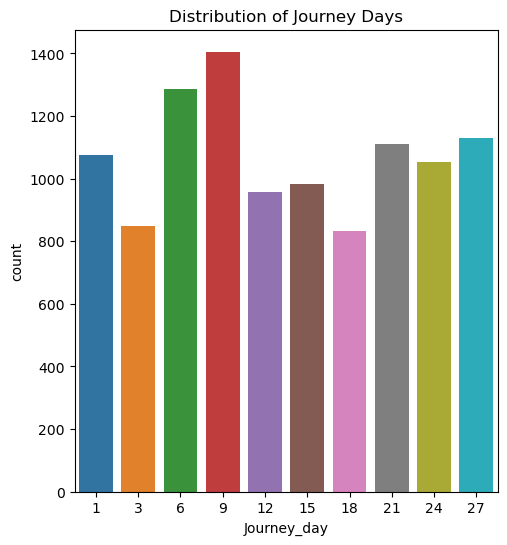

In [210]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.countplot(x="Journey_day", data=train_data)
plt.title('Distribution of Journey Days')

In [211]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


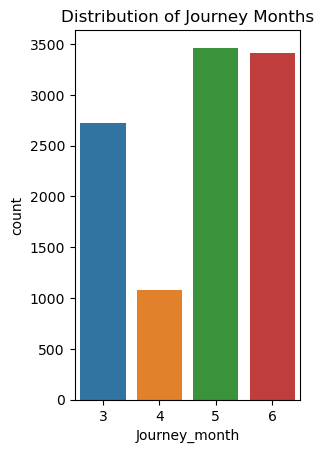

In [212]:
plt.subplot(1, 2, 2)
sns.countplot(x="Journey_month", data=train_data)
plt.title('Distribution of Journey Months')
plt.show()

# Q.2 Perform Exploratory Data Analysis (EDA)

In [213]:
# Count of flights for every airline
preferred_airline = train_data['Airline'].value_counts()
print("Most preferred airline:", preferred_airline.idxmax())

Most preferred airline: Jet Airways


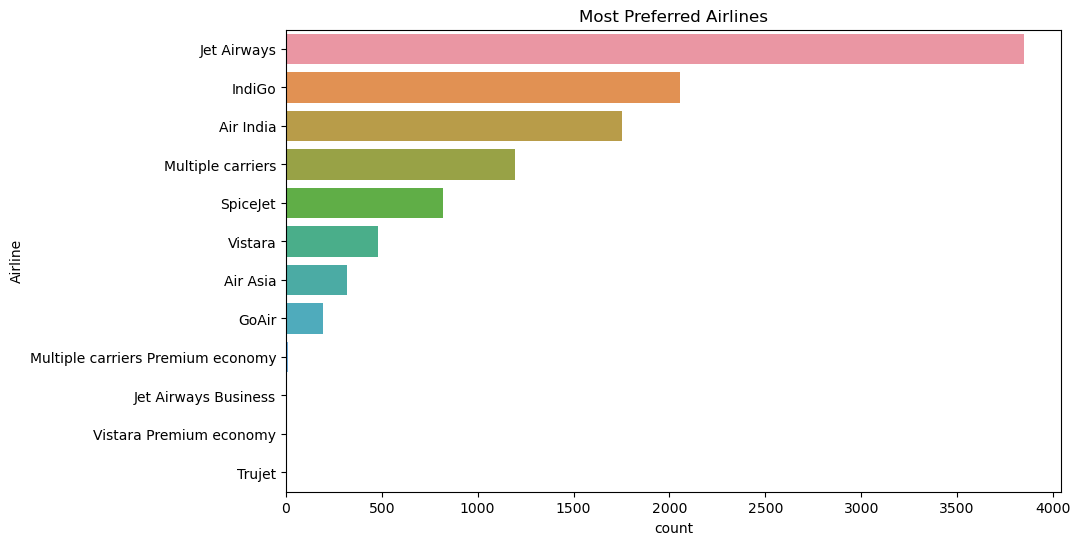

In [214]:
# Plot for most preferred airline
plt.figure(figsize=(10,6))
sns.countplot(y="Airline", data=train_data, order=train_data['Airline'].value_counts().index)
plt.title("Most Preferred Airlines")
plt.show()

In [215]:
# Count of flights from each source
preferred_source = train_data['Source'].value_counts()
print("Majority of flights take off from:", preferred_source.idxmax())

Majority of flights take off from: Delhi


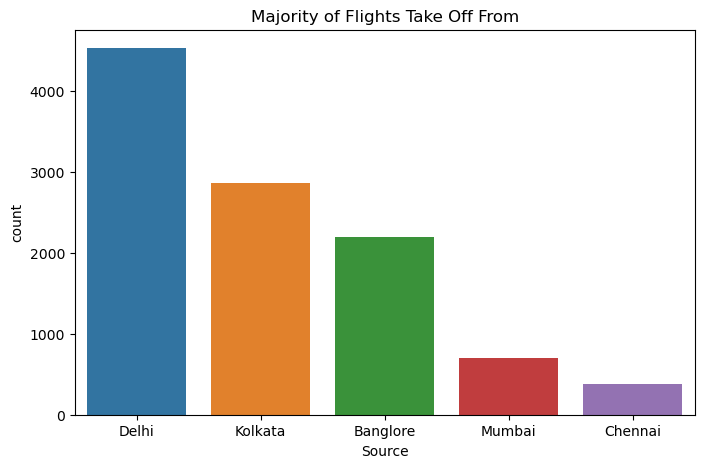

In [216]:
plt.figure(figsize=(8,5))
sns.countplot(x="Source", data=train_data, order=train_data['Source'].value_counts().index)
plt.title("Majority of Flights Take Off From")
plt.show()

In [217]:
# Max Flight
preferred_destination = train_data['Destination'].value_counts()
print("Maximum flights land in:", preferred_destination.idxmax())

Maximum flights land in: Cochin


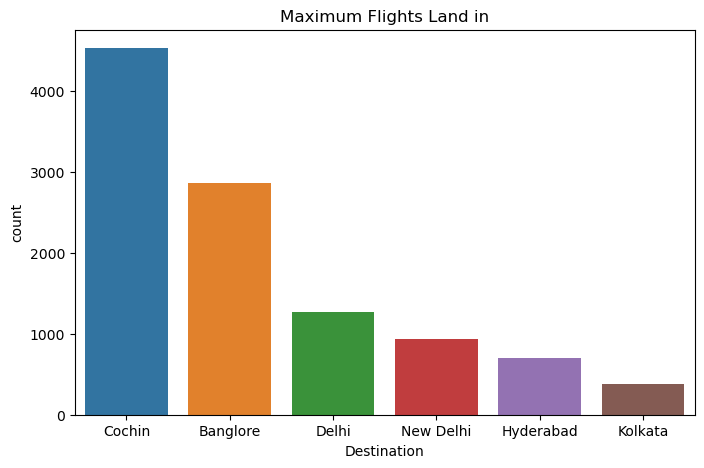

In [218]:
plt.figure(figsize=(8,5))
sns.countplot(x="Destination", data=train_data, order=train_data['Destination'].value_counts().index)
plt.title("Maximum Flights Land in")
plt.show()

# Compare independent features with Target feature to check the impact on price

In [219]:
# Which airline has the highest price
airline_price = train_data.groupby('Airline')['Price'].mean().sort_values(ascending=False)
print("Airline with highest average price:", airline_price.idxmax())


Airline with highest average price: Jet Airways Business


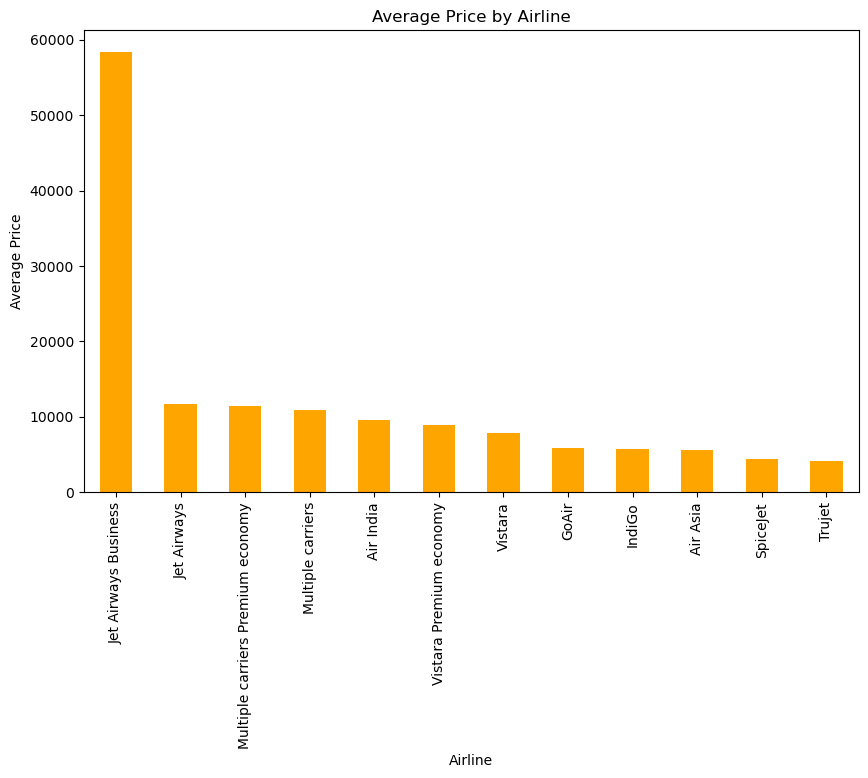

In [220]:
# Plot for average price by airline
plt.figure(figsize=(10,6))
airline_price.plot(kind='bar', color='orange')
plt.title("Average Price by Airline")
plt.ylabel("Average Price")
plt.show()

In [221]:
#Check if the business class flights are high price or low and find only those flights which price is higher than 50k by filtering for business class and price > 50k
business_class_flights = train_data[(train_data['Additional_Info'] == 'Business class') & (train_data['Price'] > 50000)]
print("Business class flights with price > 50k:\n", business_class_flights[['Airline', 'Price']])

Business class flights with price > 50k:
                     Airline  Price
2924   Jet Airways Business  79512
5372   Jet Airways Business  62427
10364  Jet Airways Business  57209


In [222]:
# Encoding categorical features for model training
train_data.drop(columns=['Route'], inplace=True)
train_data.drop(columns=['Additional_Info'], inplace=True)

# Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model. 

In [223]:
# Splitting Data into Features and Target
X = train_data.drop(["Price"], axis=1)
y = train_data["Price"]

# Ensure that all features are numerical
print(X.dtypes)

# If any categorical data remains, apply one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Now proceed with training the model

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Airline          object
Source           object
Destination      object
Dep_Time         object
Arrival_Time     object
Duration         object
Total_Stops      object
Journey_day       int32
Journey_month     int32
dtype: object


In [224]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression MAE:", metrics.mean_absolute_error(y_test, lr_pred))
print("Linear Regression MSE:", metrics.mean_squared_error(y_test, lr_pred))
print("Linear Regression RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))


Linear Regression MAE: 68830203213.3066
Linear Regression MSE: 1.451786658239674e+23
Linear Regression RMSE: 381023182790.716


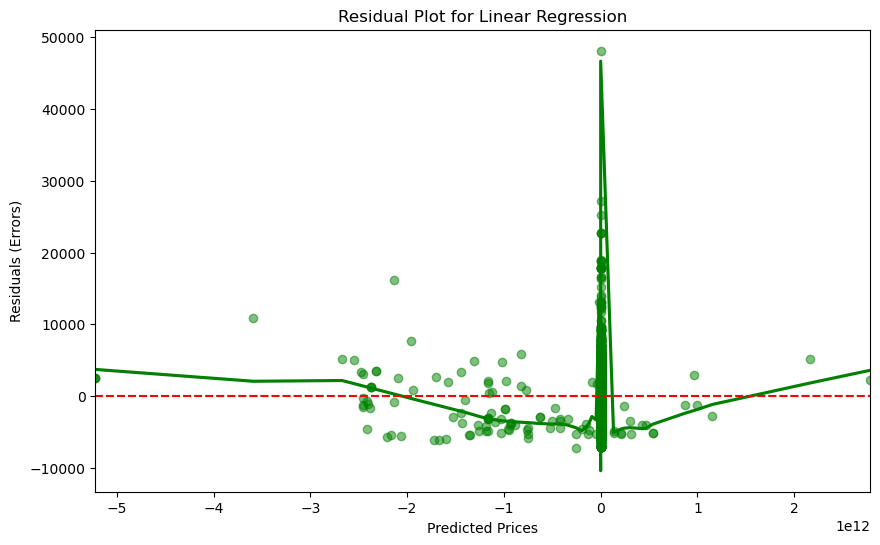

In [225]:
#Residual Plot (Errors)
plt.figure(figsize=(10, 6))
sns.residplot(x=lr_pred, y=y_test - lr_pred, lowess=True, color="g", scatter_kws={'alpha':0.5})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot for Linear Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

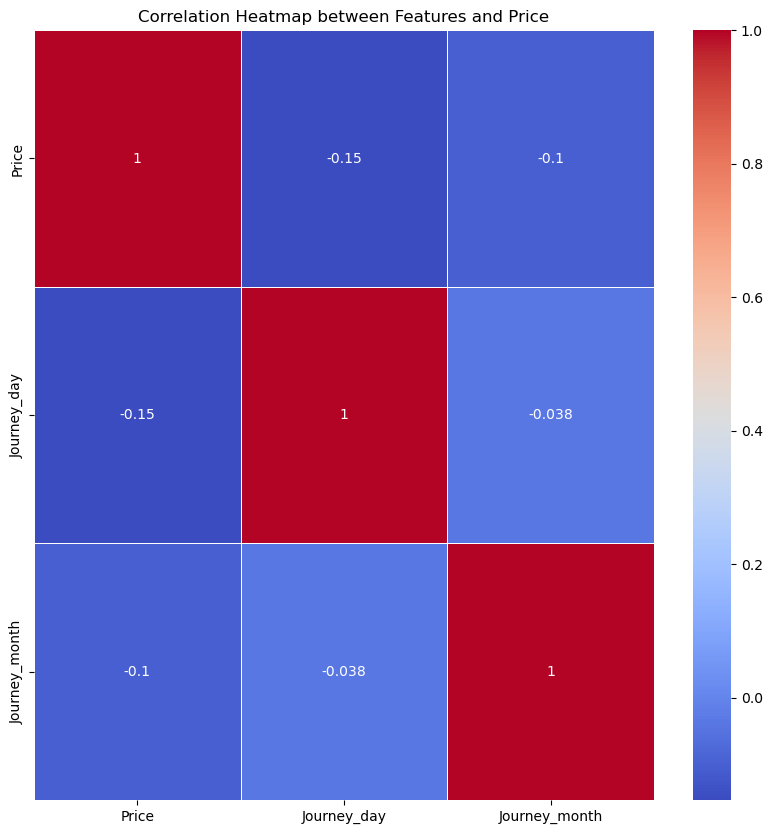

In [226]:
#Correlation Heatmap
plt.figure(figsize=(10, 10))
numeric_data = train_data.select_dtypes(include=[np.number]) 
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap between Features and Price')
plt.show()


In [227]:
# Decision Tree Regressor:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Decision Tree Evaluation:
print("Decision Tree MAE:", metrics.mean_absolute_error(y_test, dt_pred))
print("Decision Tree MSE:", metrics.mean_squared_error(y_test, dt_pred))
print("Decision Tree RMSE:", np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))



Decision Tree MAE: 1249.2244969583528
Decision Tree MSE: 4693705.414010946
Decision Tree RMSE: 2166.4961144693857


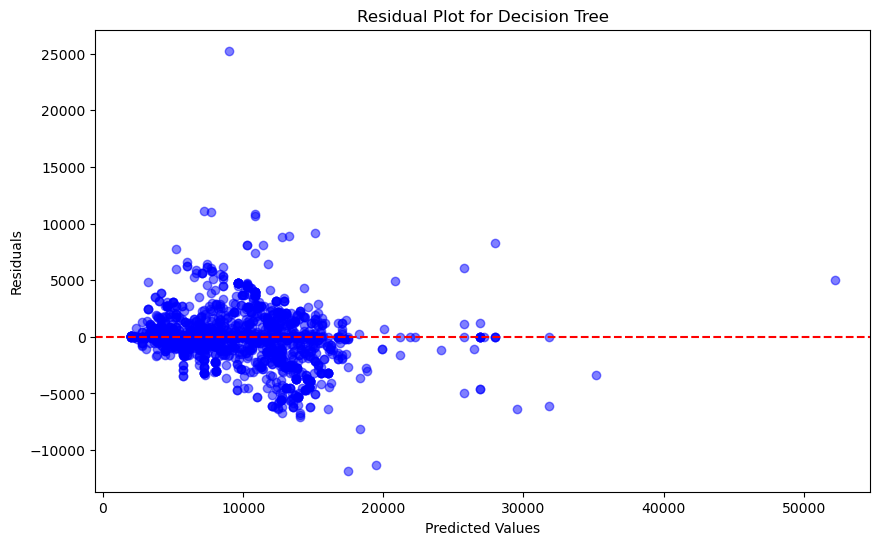

In [228]:
# Calculate residuals
residuals = y_test - dt_pred

# Residual Plot:
plt.figure(figsize=(10, 6))
plt.scatter(dt_pred, residuals, color='b', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Decision Tree")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [229]:
# Random Forest Regressor:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [230]:
# Random Forest Evaluation:
print("Random Forest MAE:", metrics.mean_absolute_error(y_test, rf_pred))
print("Random Forest MSE:", metrics.mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Random Forest MAE: 1141.3405055187884
Random Forest MSE: 3580459.6404949585
Random Forest RMSE: 1892.210252719015


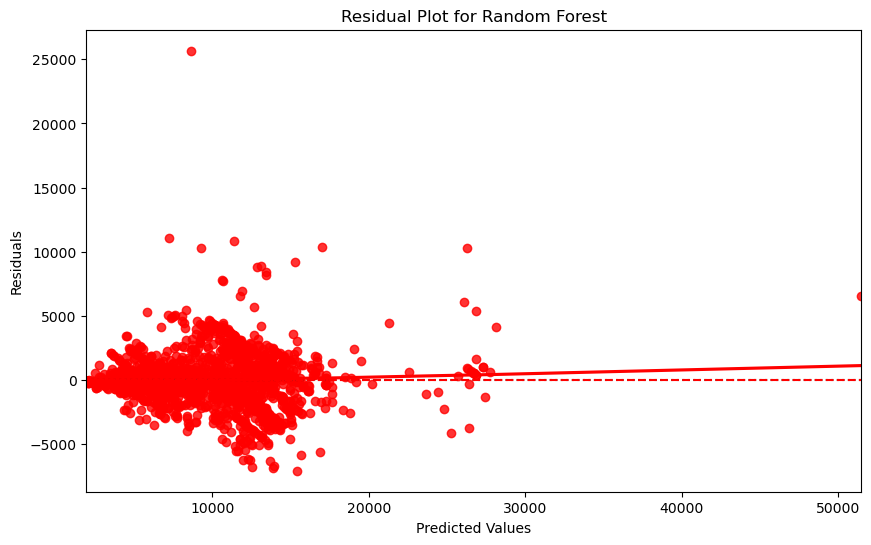

In [233]:
# Residual Plot:
plt.figure(figsize=(10, 6))
sns.residplot(x=rf_pred, y=y_test, lowess=True, color="r") 
plt.title("Residual Plot for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals") 
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement. 




In [200]:
# Model Comparison Summary
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lr_pred))}")
print(f"Decision Tree RMSE: {np.sqrt(metrics.mean_squared_error(y_test, dt_pred))}")
print(f"Random Forest RMSE: {np.sqrt(metrics.mean_squared_error(y_test, rf_pred))}")


Model Comparison:
Linear Regression RMSE: 381023182790.716
Decision Tree RMSE: 2186.99180140914
Random Forest RMSE: 1891.6853066765414
